In [32]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# Step 1: Get S&P 500 ticker symbols
df = pd.read_csv(r"C:\Users\mamun\Downloads\S&P 500 Companies (Standard and Poor 500) - basics.csv")
sp500_tickers = df['Symbol'].tolist()

In [34]:
# Step 2: Download historical price data
data = yf.download(sp500_tickers, start='2022-01-01', end='2023-01-01')['Adj Close']
data = data.dropna(axis=1, how='all')

[*********************100%***********************]  500 of 500 completed

124 Failed downloads:
['MHP', 'TWC', 'PCLN', 'CVC', 'WLP', 'LLTC', 'WPO', 'MWV', 'TSO', 'TYC', 'MOLX', 'STJ', 'LUK', 'JDSU', 'HSP', 'SNI', 'MJN', 'ARG', 'SPLS', 'WYN', 'SNDK', 'CVH', 'CSC', 'APOL', 'CCE', 'ZMH', 'TE', 'BF.B', 'HNZ', 'PCP', 'BCR', 'COL', 'JOY', 'BMS', 'KFT', 'ESRX', 'HOT', 'LTD', 'CFN', 'COH', 'WPI', 'BRCM', 'CBE', 'LXK', 'CBG', 'ACE', 'TIE', 'BHI', 'NYX', 'WFM', 'SWY', 'CAM', 'HCBK', 'AET', 'NFX', 'DPS', 'SIAL', 'FDO', 'HCN', 'SCG', 'WAG', 'RAI', 'PCS', 'TWX', 'LO']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2022-01-01 -> 2023-01-01)')
['XLNX', 'DTV', 'VAR', 'UTX', 'RHT', 'PBCT', 'FRX', 'WIN', 'FTR', 'MYL', 'ESV', 'FII', 'PKI', 'RRD', 'XL', 'BLL', 'JEC', 'APC', 'TSS', 'TIF', 'YHOO', 'CBS', 'COG', 'BBT', 'JCP', 'AVP', 'HRS', 'ETFC', 'RDC', 'RTN', 'PXD', 'BRK.B', 'CERN', 'TMK', 'FLIR', 'LSI', 'DNR', 'DISCA', 'LIFE', 'SYMC', 'CTXS', 'DF', 'BBBY', 'LLL', 'CELG', 'AL

In [35]:
# Step 3: Calculate log returns
log_returns = np.log(data / data.shift(1)).dropna(axis=0, how='all')

In [36]:
# Step 4: Calculate correlation matrix
correlation_matrix = log_returns.corr()

In [37]:
# Step 5: Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of S&P 500 Stocks (Log Returns)")
plt.show()

KeyboardInterrupt: 

In [43]:
# Step 6: Identify pairs with low correlation
low_corr_pairs = correlation_matrix[(correlation_matrix.abs() < 0.3) & (correlation_matrix != 1.0)]
low_corr_pairs.index.names = [None]

# Stack and reset the index
low_corr_pairs = low_corr_pairs.stack().reset_index()
    
# Rename the columns manually
low_corr_pairs.columns = ['Stock_1', 'Stock_2', 'Correlation']
    
# Sort each pair alphabetically
sorted_pairs = low_corr_pairs[['Stock_1', 'Stock_2']].apply(lambda x: sorted(x), axis=1)
low_corr_pairs['Stock_1'] = sorted_pairs.apply(lambda x: x[0])
low_corr_pairs['Stock_2'] = sorted_pairs.apply(lambda x: x[1])

# Remove duplicate pairs
low_corr_pairs = low_corr_pairs.drop_duplicates(subset=['Stock_1', 'Stock_2'])

# Round the correlation column to 3 decimal places
low_corr_pairs['Correlation'] = low_corr_pairs['Correlation'].round(4)

# Sort by correlation value
low_corr_pairs = low_corr_pairs.reindex(
    low_corr_pairs['Correlation'].abs().sort_values(ascending=True).index
)

# Print result
print("Pairs of stocks with low correlation:")
print(low_corr_pairs.to_string(index=False))

Pairs of stocks with low correlation:
Stock_1 Stock_2  Correlation
     NU     SJM       0.0002
    BMY     DVA       0.0003
    APH     STI      -0.0003
    BMC     TSN       0.0003
    STI     TDC       0.0005
    ANR     AZO      -0.0005
    APA     STI       0.0006
    HPQ     STI      -0.0006
    ANR     YUM       0.0007
     CF     HAR      -0.0008
    NRG     POM      -0.0008
    BEN     TEG      -0.0009
     RF     STI       0.0009
    CHK     POM       0.0010
    CLX     SAI      -0.0010
    HAR     PPL       0.0010
    CNX     GAS       0.0010
    GME     MRK      -0.0012
   ADSK     STI       0.0012
   BEAM      KR       0.0013
     ED       S      -0.0013
      K     TER      -0.0013
    BMC     SLM      -0.0014
      D     SAI       0.0015
    HAR     TXN      -0.0015
    TEG     UNH      -0.0015
   FOSL     NOC      -0.0016
    HRL     POM       0.0016
    IBM     TEG       0.0016
    HCP     NOC       0.0017
    FHN     TEG      -0.0018
   INTU     STI      -0.0018
    D

In [99]:
# Step 7: Choose what stocks to buy
buy_list = []
for _, row in low_corr_pairs.head(10).iterrows():
    # Append Stock_1 if not already in the list
    if row['Stock_1'] not in buy_list:
        buy_list.append(row['Stock_1'])
    
    # Append Stock_2 if not already in the list
    if row['Stock_2'] not in buy_list:
        buy_list.append(row['Stock_2'])

print("Unique tickers from top 10 pairs:", buy_list)

Unique tickers from top 10 pairs: ['NU', 'SJM', 'BMY', 'DVA', 'APH', 'STI', 'BMC', 'TSN', 'TDC', 'ANR', 'AZO', 'APA', 'HPQ', 'YUM', 'CF', 'HAR']


In [136]:
def prepare_data(ticker):
    data = pd.DataFrame(yf.download(ticker, start='2023-01-01', end='2024-01-01'))
    data["SMA"] = data["Adj Close"].rolling(30).mean()
    data["Lower"] = data["SMA"] - data["Adj Close"].rolling(30).std() * 2
    data["Upper"] = data["SMA"] + data["Adj Close"].rolling(30).std() * 2
    data['Log Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
    
    # Calculate momentum indicators
    window = 14
    delta = data['Adj Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))
    
    data['ROC'] = data['Adj Close'].pct_change(10)
    
    # Volume-based indicator
    data['Avg_Volume'] = data['Volume'].rolling(window=20).mean()
    
    return data

In [137]:
# Step 9: Testing strategy and the positions
def test_strategy(ticker, momentum_weight=2, rsi_threshold=70, roc_threshold=0.05, volume_multiplier=1.5):
    data = prepare_data(ticker)
    
    # Bollinger Bands strategy
    data['Distance'] = data['Adj Close'] - data['SMA']
    data['BB_Position'] = np.where(data['Adj Close'] < data['Lower'], 1, np.nan)
    data['BB_Position'] = np.where(data['Adj Close'] > data['Upper'], -1, data['BB_Position'])
    data['BB_Position'] = np.where(data['Distance'] * data['Distance'].shift(1) < 0, 0, data['BB_Position'])
    data['BB_Position'] = data['BB_Position'].ffill().fillna(0)

    # Momentum strategy (prioritize RSI & ROC)
    data['Momentum_Position'] = np.where((data['RSI'] > rsi_threshold) & (data['ROC'] > roc_threshold), 1, 
                                         np.where((data['RSI'] < 100 - rsi_threshold) & (data['ROC'] < -roc_threshold), -1, 0))
    
    # Volume-based confirmation
    data['Volume_Signal'] = data['Volume'] > (data['Avg_Volume'] * volume_multiplier)
    
    # Combine all signals for rally confirmation without using MAs
    data['Rally_Signal'] = (
        (data['Momentum_Position'] == 1) &  # Momentum signal is positive
        (data['Volume_Signal'])  # Volume is spiking
    )
    
    data['Rally_Signal'] = np.where(data['Rally_Signal'], 1, 0)  # Use 1 for rallies
    
    # Apply combined position that is weighted by momentum
    weighted_momentum = data['Momentum_Position'] * momentum_weight
    data['Combined_Position'] = np.where(
        data['Rally_Signal'], weighted_momentum,  # Take weighted position if rally signal is positive
        data['BB_Position']  # Otherwise follow Bollinger Bands strategy
    )
    
    # Calculate strategy returns
    data['Strategy'] = data['Combined_Position'].shift(1) * data['Log Returns']
    data.dropna(inplace=True)
    
    # Calculate cumulative strategy returns
    data['Cumulative Strategy'] = data['Strategy'].cumsum().apply(np.exp)
    
    return data['Cumulative Strategy']

In [138]:
# Step 10: Combining the strategy on all the chosen stocks
def combine_strategies(tickers, momentum_weight=2, rsi_threshold=70, roc_threshold=0.05, volume_multiplier=1.5):
    strategies = []

    # Test strategy for each ticker and store the result
    for ticker in tickers:
        strategy = test_strategy(ticker, momentum_weight, rsi_threshold, roc_threshold, volume_multiplier)
        strategies.append(strategy)

    # Combine all strategies into a DataFrame, aligning them by date
    combined_df = pd.concat(strategies, axis=1)

    # Calculate the mean strategy across all stocks
    combined_df['Mean Strategy'] = combined_df.mean(axis=1)

    return combined_df['Mean Strategy']  # Return as a NumPy array

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BMC']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-01-01 -> 2024-01-01)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ANR']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2

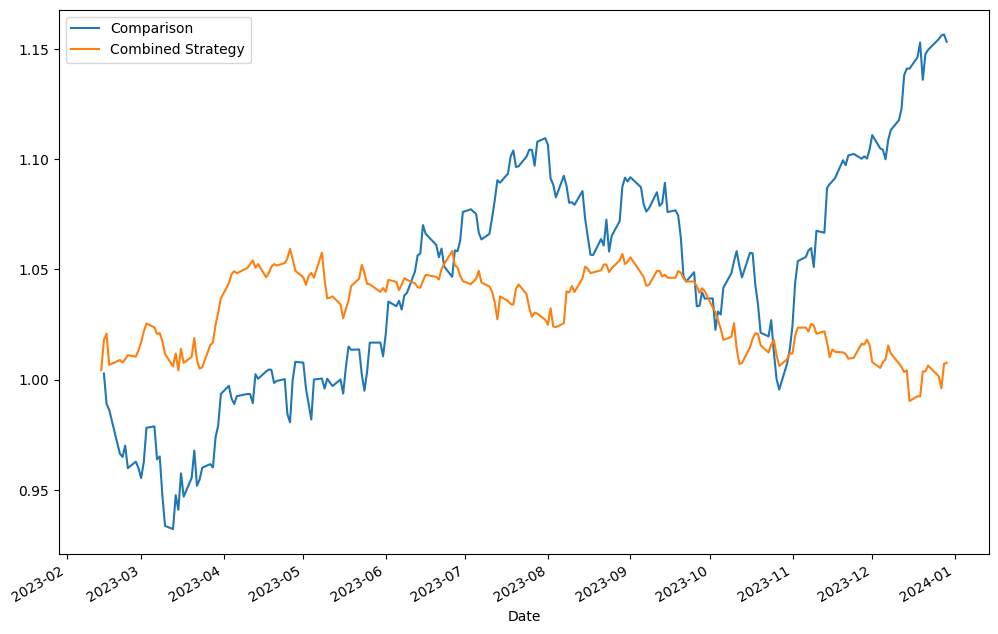

In [140]:
# Step 11: Comparing to the S&P500
metric = pd.DataFrame(yf.download('^GSPC', start='2023-01-01', end='2024-01-01')['Adj Close'])
metric['Log Returns'] = np.log(metric['Adj Close'] / metric['Adj Close'].shift(1))
metric = metric.tail(220)
metric['Cumulative Returns'] = metric['Log Returns'].cumsum().apply(np.exp)
comparison = metric['Cumulative Returns']

# Assuming `comparison` and `combine_strategies(buy_list)` are Pandas Series
comparison_series = pd.Series(comparison)  # Make sure `comparison` is a Series
combined_strategy_series = combine_strategies(buy_list)  # This should already be a Series

# Combine the Series into a DataFrame
df_to_plot = pd.DataFrame({
    'Comparison': comparison_series,
    'Combined Strategy': combined_strategy_series
})

# Plot the DataFrame
df_to_plot.plot(figsize=(12, 8))
plt.show()

In [141]:
# Step 12: Fine-tune strategy
def grid_search(tickers, rsi_values, roc_values, volume_multipliers, momentum_weights):
    results = []

    for rsi in rsi_values:
        for roc in roc_values:
            for vol_mult in volume_multipliers:
                for momentum_w in momentum_weights:
                    # Run the strategy with the current set of parameters on all tickers
                    combined_strategy = combine_strategies(
                        tickers, momentum_weight=momentum_w, 
                        rsi_threshold=rsi, roc_threshold=roc, 
                        volume_multiplier=vol_mult
                    )

                    # Calculate performance metrics
                    total_return = combined_strategy.iloc[-1]
                    sharpe_ratio = combined_strategy.pct_change().mean() / combined_strategy.pct_change().std()
                    max_drawdown = (combined_strategy.cummax() - combined_strategy).max()
                    
                    # Save results
                    results.append({
                        'RSI Threshold': rsi,
                        'ROC Threshold': roc,
                        'Volume Multiplier': vol_mult,
                        'Momentum Weight': momentum_w,
                        'Total Return': total_return,
                        'Sharpe Ratio': sharpe_ratio,
                        'Max Drawdown': max_drawdown
                    })

    # Create a DataFrame of results to analyze
    results_df = pd.DataFrame(results)
    return results_df

# Define parameter ranges
rsi_values = range(60, 80, 5)  # For example, RSI threshold from 60 to 75
roc_values = [0.03, 0.05, 0.07]  # ROC threshold options
volume_multipliers = [1.2, 1.5, 1.8]  # Volume multiplier options
momentum_weights = [1, 2, 3]  # Momentum weights

# Run grid search
results_df = grid_search(buy_list, rsi_values, roc_values, volume_multipliers, momentum_weights)

# Find the best combination based on Sharpe Ratio
best_params = results_df.sort_values(by='Sharpe Ratio', ascending=False).iloc[0]
print("Best parameters:", best_params)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BMC']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-01-01 -> 2024-01-01)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ANR']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-01-01 -> 2024-01-01)')
[*********************100%****************

Best parameters: RSI Threshold        75.000000
ROC Threshold         0.030000
Volume Multiplier     1.800000
Momentum Weight       3.000000
Total Return          1.048748
Sharpe Ratio          0.042397
Max Drawdown          0.061004
Name: 89, dtype: float64


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BMC']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-01-01 -> 2024-01-01)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ANR']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-01-01 -> 2024-01-01)')
[*********************100%****************

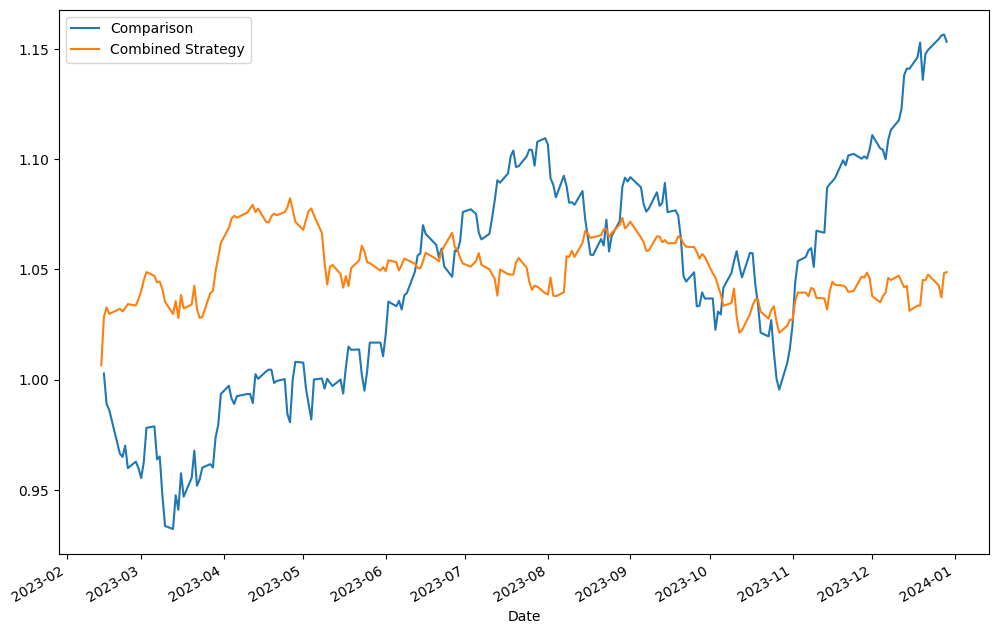

In [142]:
# Step 13: Retest
# Assuming `comparison` and `combine_strategies(buy_list)` are Pandas Series
comparison_series = pd.Series(comparison)  # Make sure `comparison` is a Series
combined_strategy_series = combine_strategies(buy_list, momentum_weight=3, rsi_threshold=75, roc_threshold=0.03, volume_multiplier=1.8)  # This should already be a Series

# Combine the Series into a DataFrame
df_to_plot = pd.DataFrame({
    'Comparison': comparison_series,
    'Combined Strategy': combined_strategy_series
})

# Plot the DataFrame
df_to_plot.plot(figsize=(12, 8))
plt.show()